In [2]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.integrate import simps
from numpy import trapz

from angstrom import Molecule
from wham2d import *
from dctst import *
from wham_plot import *

%matplotlib inline

## WHAM 2-D
Analyze WHAM-2D data.

In [3]:
SCAN = 'DC_Cu110'
SCANDIR = '/home/kutay/Documents/git/Nanocar/surface-scan'
DATADIR = os.path.join(SCANDIR, 'analysis', 'data')
WHAMDIR = os.path.join(SCANDIR, 'analysis', 'dctst', 'run2d')
HIST = dict(x=(21, 26), y=(22, 26))

In [4]:
outfile = os.path.join(WHAMDIR, SCAN, 'wham-2d.out')
DATA = read_wham_out_list(outfile)

In [8]:
allx, ally, weights = [], [], []
for i, d in enumerate(DATA):
    allx += d['x']
    ally += d['y']
    weights += d['free']

In [64]:
def plot_surface_hist(xdata, ydata, weights=None, cmap='GnBu_r', cmin=None, cmax=None, xlim=(21, 25.8), ylim=(22.3, 26.0), bin_size=(0.1, 0.1), figsize=(5, 4), dpi=200, save=None):
    """
    Plot 2D histogram of molecule position.
    """
    surfatoms1 = [[21.582, 22.8912], [25.179, 22.8912], [21.582, 25.4346], [25.179, 25.4346]]
    surfatoms2 = [23.3805, 24.1629]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    bins = (abs(xlim[1] - xlim[0]) / bin_size[0], abs(ylim[1] - ylim[0]) / bin_size[1])
    print('Bins || x: %.2f Å (%.2f) | y: %.2f Å (%.2f)' % (bin_size[0], bins[0], bin_size[1], bins[1]))
    h, xedges, yedges, img = plt.hist2d(xdata, ydata, bins=bins, cmap=cmap, weights=weights, cmin=cmin, cmax=cmax)
    plt.colorbar()
    plt.scatter([i[0] for i in surfatoms1], [i[1] for i in surfatoms1], c='k', alpha=0.7, s=200, edgecolors='w', lw=2)
    plt.scatter(surfatoms2[0], surfatoms2[1], c='k', alpha=0.5, s=200, edgecolors='k', lw=2)
    plt.xlim(xlim)
    plt.ylim(ylim)
    if save is not None:
        plt.savefig(save, dpi=dpi, transparent=True, bbox_inches='tight')
    return h, xedges, yedges

Bins || x: 0.20 Å (17.98) | y: 0.10 Å (25.43)


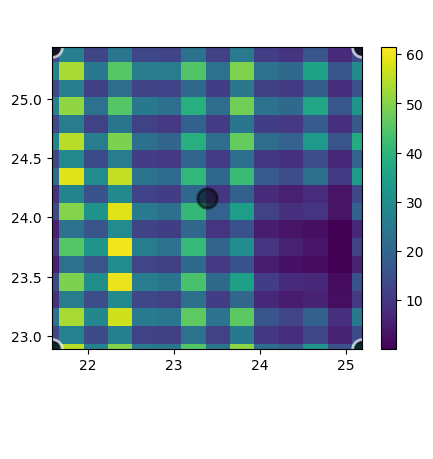

In [67]:
# xlim=(21.5, 25.3), ylim=(22.8, 25.5)
h, x, y = plot_surface_hist(allx, ally, weights=weights, bin_size=(0.2, 0.1), cmap='viridis', xlim=(21.582, 25.179), ylim=(22.8912, 25.4346), dpi=100)